<a href="https://colab.research.google.com/github/abdelhadi-12/Machine-Learning-/blob/main/Diamond_Price_Prediction_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving diamonds.csv to diamonds.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
from xgboost import plot_importance


In [ ]:
data = pd.read_csv("diamonds.csv")

# Nettoyage de données

In [ ]:

data = data.drop(["Unnamed: 0"], axis=1)
data = data.drop(data[data["x"] == 0].index)
data = data.drop(data[data["y"] == 0].index)
data = data.drop(data[data["z"] == 0].index)

data = data[(data["depth"] < 75) & (data["depth"] > 45)]
data = data[(data["table"] < 80) & (data["table"] > 40)]
data = data[(data["x"] < 30)]
data = data[(data["y"] < 30)]
data = data[(data["z"] < 30) & (data["z"] > 2)]

# Encodage des variables catégoriques

In [ ]:

label_data = data.copy()
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    label_data[col] = le.fit_transform(data[col])

# Séparation des données

In [ ]:

X = label_data.drop("price", axis=1)
y = label_data["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entraînement du modèle XGBoost

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'  # obligatoire pour XGBoost >1.0
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Prédictions et évaluation

In [ ]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- XGBoost Regressor ---")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

--- XGBoost Regressor ---
Mean Squared Error: 286536.69
R² Score: 0.98


# Visualisation des résultats

In [ ]:

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

# MSE

Text(0, 0.5, 'Fréquence')

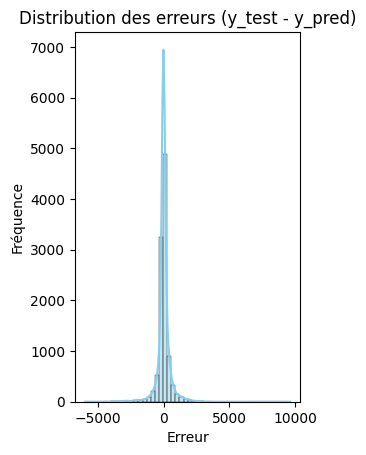

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot((y_test - y_pred), bins=50, kde=True, color="skyblue")
plt.title("Distribution des erreurs (y_test - y_pred)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")

# Réel vs Prédit

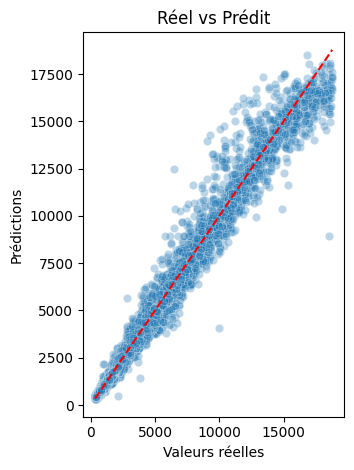

In [ ]:

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Réel vs Prédit")

plt.tight_layout()
plt.show()



# 🔍 Importance des variables

<Figure size 1000x600 with 0 Axes>

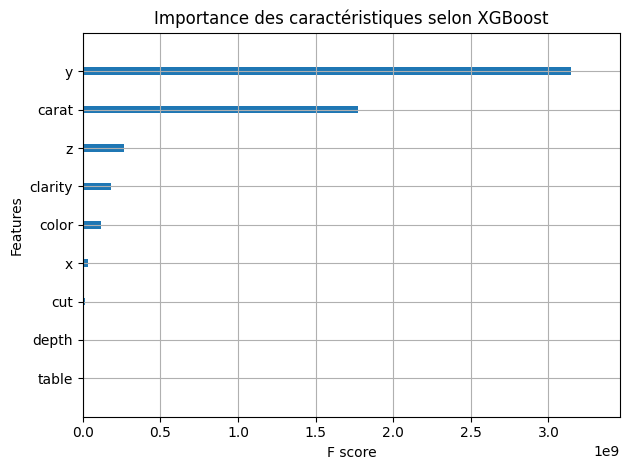

In [ ]:

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("Importance des caractéristiques selon XGBoost")
plt.tight_layout()
plt.show()